Equation
$$\rho u \frac{d\phi}{dx}- \Gamma \frac{d^2 \phi}{d x^2}=\frac{\rho u}{L}$$
with $$0 ≤ x ≤ L$$ $$\phi(0)=0$$ $$\phi(L)=0$$ 
The analytical solution is $$\phi(x) = \frac{x}{L} - \frac{1-exp(\frac{\rho u x}{\Gamma})}{1-exp(\frac{\rho u L}{\Gamma})}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data
phi_0=0
phi_L=0
rho=2
u=4
startpoint=0
G=0.5
L=2

np.random.seed(10)
n=10
h=(L-startpoint)/n 
x=np.linspace(startpoint+h/2,L-h/2,n) 
phi=x/L - (1-np.exp(rho*u*x/G))/(1-np.exp(rho*u*L/G))
x

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9])

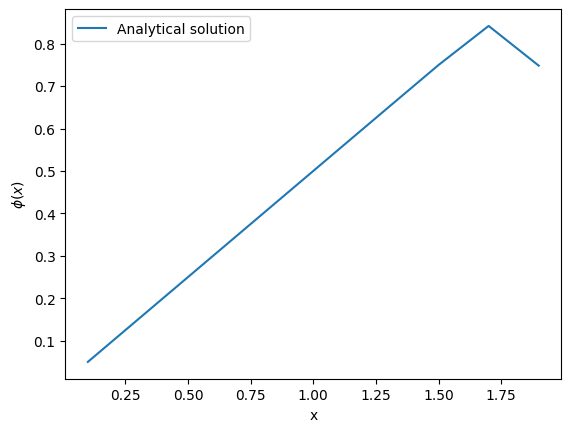

In [3]:
plt.plot(x,phi,label="Analytical solution")
plt.xlabel("x")
plt.ylabel(r"$\phi(x)$")
plt.legend()
plt.show()

### 1. The limiting velocity $u$ to ensure boundedness

$$\text{The convective mass flux per unit area  } F=\rho u$$
$$\text{The diffusion conductance at cell faces  } D=\frac{\Gamma}{\delta x}$$
$$\text{Peclet number  } Pe=\frac{F}{D}$$

$$Pe=\frac{F}{D}=\frac{\rho u}{\Gamma/\delta x}<2 \text{  for boundedness}$$

$$\text{Hence  } u<\frac{2\Gamma}{\rho\delta x}$$

In [4]:
print("u<",2*G/(rho*h))

u< 2.5


Hence we obtain $$u < 2.5$$ for boundedness with $10$ nodes grid.
 If we reduce the number of nodes, we will get a smaller upper bound on $u$, and vice versa.

### 2. Obtaining $\phi(x)$ profile

![Discretisation scheme](discretisation.jpg)

In [5]:
F=rho* u
D=G/h
Pe=F/D
print("Pe=",Pe)

Pe= 3.2


Since the Peclet number is greater than $2$ we cannot use the central difference scheme. So we use the upwind scheme

![upwind_coefficients](upwind_coefficients.jpg)

In [6]:
#System of linear equations
def upwind_solve(u1, L1, rho1, phi_0_1, phi_L_1, n1, F1, D1, h1):
    S=np.zeros(n1)
    
    # M*phi=S
    M=np.zeros((n1, n1))
    for i in range(1, n1 - 1):
        # if (i!=0) & (i!=n-1):
        aW= D1 + max(F1, 0)
        aE= D1 + max(0, -F1)
        aP=aW+aE #Fe=Fw=F => Fe-Fw=0
        M[i,i-1]=-aW
        M[i,i]=aP
        M[i,i+1]=-aE
        S[i]= rho1 * u1 * h1 / L1
        
        
    #Boundaries
    aE= D1 + max(0, -F1)
    M[0][0]=aE+(2 * D1 + max(0,F1))
    M[0][1]=-aE
    S[0]= rho1 * u1 * h1 / L1 + (2 * D1 + max(0,F1)) * phi_0_1
    
    aW= D1 + max(F1, 0)
    M[n1 - 1][n1 - 2]=-aW
    M[n1 - 1][n1 - 1]= aW + 2 * D1+ max(0,-F1)
    S[n1 - 1]= rho1 * u1 * h1 / L1 + (2 * D1+ max(0,-F1)) * phi_L_1
    # del aE, aW
    # print(M)
    # print(S)
    
    return np.linalg.solve(M, S)

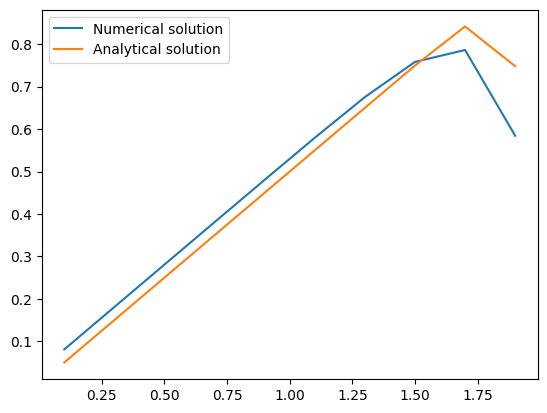

Average percentage error of solving system and analytical solution: 0.14879023756885762


In [7]:
phi_system=upwind_solve(u, L, rho, phi_0, phi_L, n, rho*u, G/h, h)
plt.plot(x, phi_system, label="Numerical solution")
plt.plot(x, phi, label="Analytical solution")
plt.legend()
plt.show()
print("Average percentage error of solving system and analytical solution:", (np.abs(phi_system - phi)/phi).sum() / n)

### 3. Using a grid $n=100$
### 4. Comparing the CD and UP methods

In [8]:
n=100

h=(L-startpoint)/n 
x=np.linspace(startpoint+h/2,L-h/2,n) 
phi=x/L - (1-np.exp(rho*u*x/G))/(1-np.exp(rho*u*L/G))
x

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99, 1.01, 1.03, 1.05, 1.07, 1.09,
       1.11, 1.13, 1.15, 1.17, 1.19, 1.21, 1.23, 1.25, 1.27, 1.29, 1.31,
       1.33, 1.35, 1.37, 1.39, 1.41, 1.43, 1.45, 1.47, 1.49, 1.51, 1.53,
       1.55, 1.57, 1.59, 1.61, 1.63, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75,
       1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.91, 1.93, 1.95, 1.97,
       1.99])

In [9]:
F=rho* u
D=G/h
Pe=F/D
print("Pe=",Pe)

Pe= 0.32


Now the Peclet number is less than $2$, so we can use a central differencing method. This number is quite small, so we can say that there is now more diffusion and less convection in our flow model. So, we can try this method and at least expect it to be stable and convergent.

![central_difference](central_difference.jpg)

![central_differnce_bounders](central_differnce_bounders.jpg)

In [10]:
#System of linear equations
def central_differencing_solve(u1, L1, rho1, phi_0_1, phi_L_1, n1, F1, D1, h1):
    S=np.zeros(n1)
    
    # M*phi=S
    M=np.zeros((n1, n1))
    for i in range(1, n1 - 1):
        # if (i!=0) & (i!=n-1):
        aW= D1 + F/2
        aE= D1 - F/2
        aP=aW+aE #Fe=Fw=F => Fe-Fw=0
        M[i,i-1]=-aW
        M[i,i]=aP
        M[i,i+1]=-aE
        S[i]= rho1 * u1 * h1 / L1
        
        
    #Boundaries
    aE= D1 -F1/2
    M[0][0]=aE+(2 * D1 + F1)
    M[0][1]=-aE
    S[0]= rho1 * u1 * h1 / L1 + (2 * D1 + F1) * phi_0_1
    
    aW= D1 +F1/2
    M[n1 - 1][n1 - 2]=-aW
    M[n1 - 1][n1 - 1]= aW + (2 * D1-F1)
    S[n1 - 1]= rho1 * u1 * h1 / L1 + (2 * D1-F1) * phi_L_1
    # print(M)
    # print(S)
    
    return np.linalg.solve(M, S)

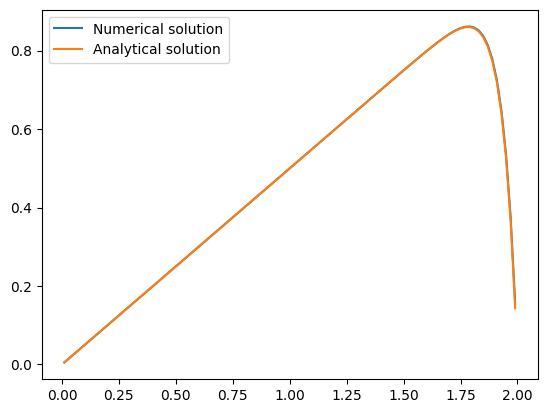

Average percentage error of solving system and analytical solution: 0.001769745016119208


In [11]:
phi_system=central_differencing_solve(u, L, rho, phi_0, phi_L, n, F, D, h)
plt.plot(x, phi_system, label="Numerical solution")
plt.plot(x, phi, label="Analytical solution")
plt.legend()
plt.show()
print("Average percentage error of solving system and analytical solution:", (np.abs(phi_system - phi)/phi).sum() / n)

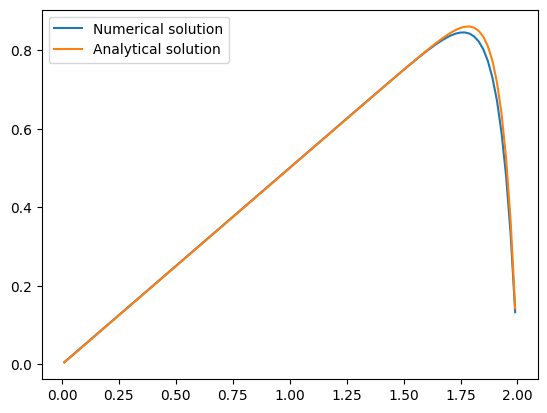

Average percentage error of solving system and analytical solution: 0.01112024233002141


In [12]:
phi_system=upwind_solve(u, L, rho, phi_0, phi_L, n, F, D, h)
plt.plot(x, phi_system, label="Numerical solution")
plt.plot(x, phi, label="Analytical solution")
plt.legend()
plt.show()
print("Average percentage error of solving system and analytical solution:", (np.abs(phi_system - phi)/phi).sum() / n)

So, we can see experimentally, that the CD scheme showed better result than the UP scheme: around $0.1\%$ persantage error compared to $1\%$

### 5. Velocity $−2 ≤ u ≤ 4$ and $n=10$ case

Because of big Peclet number (larger than $2$) we cannot use the center difference scheme. Also because the velocity can be zero the upwind scheme can be not appropriate too. So we can use some hybrid scheme. E.g. a power law scheme- it should give more accurate results  (as expected) than the original hybrid scheme and can be more stable compared with higher-order schemes (QUICK)

In [25]:
n=10
# u=np.concatenate([np.linspace(-2,-0.1,int(n/2)),np.linspace(0.1,2,int(n/2))])
u=-1

h=(L-startpoint)/n 
x=np.linspace(startpoint+h/2,L-h/2,n) 
phi=x/L - (1-np.exp(rho*u*x/G))/(1-np.exp(rho*u*L/G))
x

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9])

In [26]:
# F=max(abs(rho* u))
F=rho* u
D=G/h
Pe=abs(F/D)
print(Pe)

0.8


![power_law](power_law.jpg)

In [27]:
 #System of linear equations
def power_law_solve(u1, L1, rho1, phi_0_1, phi_L_1, n1, F1, D1, h1):
    S=np.zeros(n1)
    
    # M*phi=S
    M=np.zeros((n1, n1))
    # Pe=max(abs(rho1*u1*h/G))
    Pe=abs(rho1*u1*h/G)
    Pe_5= Pe*Pe*Pe*Pe*Pe
    for i in range(1, n1 - 1):
        # if (i!=0) & (i!=n-1):
        aW= D1*max(0,1-0.1*abs(Pe_5))+max(F,0)
        aE= D1*max(0,1-0.1*abs(Pe_5))+max(-F,0)
        aP=aW+aE #Fe=Fw=F => Fe-Fw=0
        M[i,i-1]=-aW
        M[i,i]=aP
        M[i,i+1]=-aE
        # S[i]= rho1 * u1[i] * h1 / L1
        S[i]= rho1 * u1 * h1 / L1
        
        
        
   
    #Boundaries
    mul=max(0,1-0.1*abs(Pe_5))
    aE= 2*D1*mul+max(-F,0)
    M[0][0]=aE+(2 * D1*mul + max(0,F1))
    M[0][1]=-aE
    S[0]= rho1 * u1 * h1 / L1 + (2 * D1*mul + max(0,F1)) * phi_0_1
    # S[0]= rho1 * u1[0] * h1 / L1 + (2 * D1*mul + max(0,F1)) * phi_0_1
    
    aW= D1*mul+max(F,0)
    M[n1 - 1][n1 - 2]=-aW
    M[n1 - 1][n1 - 1]= aW + 2 * D1*mul+max(-F1,0)
    S[n1 - 1]= rho1 * u1 * h1 / L1 + (2 * D1*mul + max(0,-F1)) * phi_L_1
    # S[n1 - 1]= rho1 * u1[n1-1] * h1 / L1 + (2 * D1*mul + max(0,-F1)) * phi_0_1
        
    # print(M)
    # print(S)
    
    return np.linalg.solve(M, S)

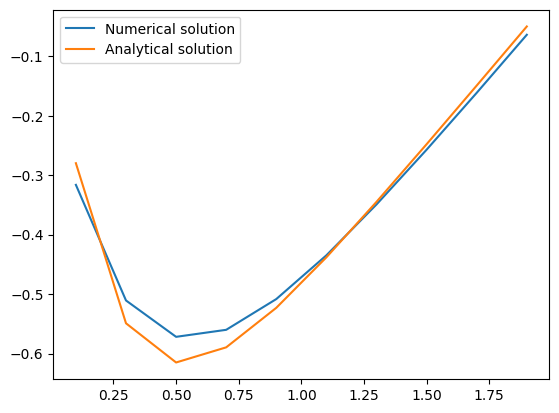

Average percentage error of solving system and analytical solution: 0.07676508633331355


In [28]:
phi_system=power_law_solve(u, L, rho, phi_0, phi_L, n, F, D, h)
plt.plot(x, phi_system, label="Numerical solution")
plt.plot(x, phi, label="Analytical solution")
plt.legend()
plt.show()
print("Average percentage error of solving system and analytical solution:", np.abs((phi_system - phi)/phi).sum() / n)

We obtain error result around $7\%$

![hybrid_scheme](hybrid_scheme.jpg)

In [31]:
 #System of linear equations
def hybrid_scheme_solve(u1, L1, rho1, phi_0_1, phi_L_1, n1, F1, D1, h1):
    S=np.zeros(n1)
    
    # M*phi=S
    M=np.zeros((n1, n1))
    for i in range(1, n1 - 1):
        # if (i!=0) & (i!=n-1):
        aW= max(F1,D1+F1/2,0)
        aE=  max(-F1,D1-F1/2,0)
        aP=aW+aE #Fe=Fw=F => Fe-Fw=0
        M[i,i-1]=-aW
        M[i,i]=aP
        M[i,i+1]=-aE
        # S[i]= rho1 * u1[i] * h1 / L1
        S[i]= rho1 * u1 * h1 / L1
        
        
        
   
    #Boundaries
    aE= max(-F1,2*D1-F1/2,0)
    M[0][0]=aE+ max(F1,D1+F1/2,0)
    M[0][1]=-aE
    S[0]= rho1 * u1 * h1 / L1 +  max(F1,D1+F1/2,0)* phi_0_1
    # S[0]= rho1 * u1[0] * h1 / L1 + (2 * D1*mul + max(0,F1)) * phi_0_1
    
    aW= max(F1,D1+F1/2,0)
    M[n1 - 1][n1 - 2]=-aW
    M[n1 - 1][n1 - 1]= aW + max(-F1,D1-F1/2,0)
    S[n1 - 1]= rho1 * u1 * h1 / L1 + max(-F1,D1-F1/2,0) * phi_L_1
    # S[n1 - 1]= rho1 * u1[n1-1] * h1 / L1 + (2 * D1*mul + max(0,-F1)) * phi_0_1
        
    # print(M)
    # print(S)
    
    return np.linalg.solve(M, S)

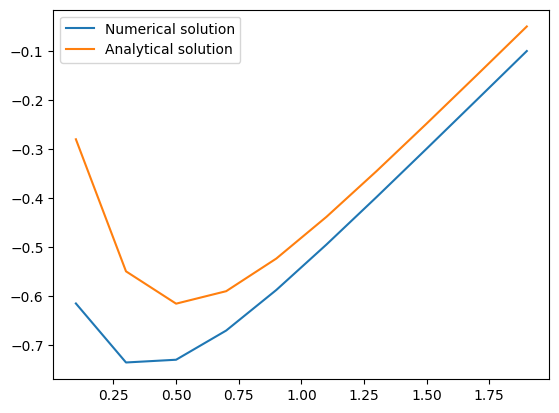

Average percentage error of solving system and analytical solution: 0.3810524460615184


In [32]:
phi_system=hybrid_scheme_solve(u, L, rho, phi_0, phi_L, n, F, D, h)
plt.plot(x, phi_system, label="Numerical solution")
plt.plot(x, phi, label="Analytical solution")
plt.legend()
plt.show()
print("Average percentage error of solving system and analytical solution:", np.abs((phi_system - phi)/phi).sum() / n)

But original hybrid scheme, as expected has even more, $38\%$ error.

So, considered max allowed number of points $(n=10)$, the obtained result is quite good and universal for both large and small Peclet numbers